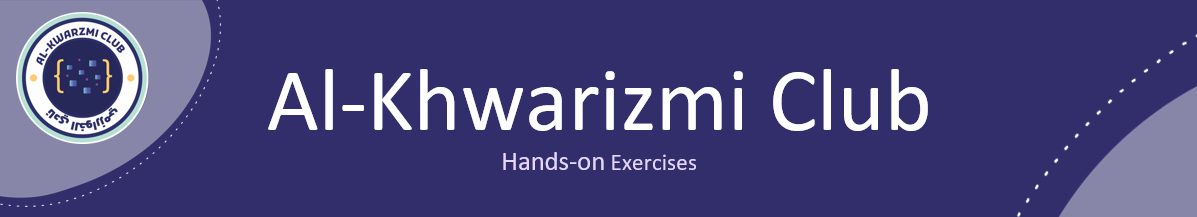

 Open in Google Colab:

[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://drive.google.com/file/d/1fidvcdY1mwqsExi1_yqXcEgSQH2FQqHt/view?usp=sharing)

# Deep Learning Basics

Welcome to this notebook! Here, you'll learn the basics of **Deep Learning**. Deep learning is part of **Artificial Intelligence (AI)** where we teach computers to learn from examples.

Imagine you want a computer to recognize handwritten digits (like in the famous MNIST dataset). This is where **deep learning** comes in. Let's get started by learning some basic terms.


## Key Terms

1. **Neurons**: The basic building blocks of a neural network. Like brain cells, they "fire" when they recognize something.
2. **Layers**: Neurons are organized into layers. We have **input layers**, **hidden layers**, and **output layers**.
3. **Weights**: Neurons use weights to adjust and make decisions. Training adjusts these weights.
4. **Activation Function**: Helps neurons decide whether to activate. We'll use **ReLU** for this.
5. **Loss Function**: Measures the accuracy of our predictions. The lower the loss, the better our model.
6. **Optimizer**: Adjusts weights to improve accuracy. We'll use **SGD (Stochastic Gradient Descent)**.


## Libraries Needed

In [ ]:
# Import libraries
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_data = datasets.MNIST(root="data", train=True, download=True, transform=transform)
test_data = datasets.MNIST(root="data", train=False, download=True, transform=transform)


## Understanding the MNIST Data

The **MNIST dataset** contains images of handwritten digits (0-9). Each image is 28x28 pixels, and we have labels for each image to tell us which digit it is.

Let's look at an example.


In [ ]:
# Visualize the first image and label
image, label = train_data[0]
plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"Label: {label}")
plt.show()


## Implementing a Neural Network with NumPy

Before using PyTorch, let's create a simple neural network from scratch using **NumPy**. Our network will:
- Flatten each image to a 784-length vector (28x28 pixels)
- Use a hidden layer with ReLU activation
- Output probabilities for each digit (0-9) using softmax


In [ ]:
# Import libraries
import numpy as np
from torchvision import datasets, transforms

# Load MNIST data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_data = datasets.MNIST(root="data", train=True, download=True, transform=transform)
test_data = datasets.MNIST(root="data", train=False, download=True, transform=transform)

# Initialize weights and biases
np.random.seed(0)
input_size, hidden_size, output_size = 784, 128, 10
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

# Activation and softmax functions
def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Cross-entropy loss function
def cross_entropy_loss(predictions, labels):
    n = labels.shape[0]
    log_likelihood = -np.log(predictions[range(n), labels])
    loss = np.sum(log_likelihood) / n
    return loss

# Derivative of softmax and cross-entropy
def softmax_cross_entropy_derivative(predictions, labels):
    n = labels.shape[0]
    predictions[range(n), labels] -= 1
    return predictions / n


## Explanation of Each Step
- Forward Pass: We compute the output of each layer and apply the ReLU and softmax activation functions.

- Loss Calculation: We calculate cross-entropy loss to measure the difference between predictions and labels.

- Backward Pass: Calculate gradients of the loss with respect to each weight and bias using the chain rule.

- For ReLU, the gradient is passed only for positive values.

- Weight Update: Adjust weights and biases by subtracting the gradient multiplied by the learning rate.


In [ ]:
# Training parameters
learning_rate = 0.1
epochs = 10
batch_size = 64

# Training loop
for epoch in range(epochs):
    # Shuffle data at the start of each epoch
    indices = np.random.permutation(len(train_data))
    total_loss = 0

    for i in range(0, len(train_data), batch_size):
        # Prepare mini-batch
        batch_indices = indices[i:i + batch_size]
        batch_images = np.array([train_data[j][0].numpy().flatten() for j in batch_indices])
        batch_labels = np.array([train_data[j][1] for j in batch_indices])

        # Forward pass
        z1 = np.dot(batch_images, W1) + b1
        a1 = relu(z1)
        z2 = np.dot(a1, W2) + b2
        predictions = softmax(z2)

        # Calculate loss
        loss = cross_entropy_loss(predictions, batch_labels)
        total_loss += loss

        # Backward pass (calculate gradients)
        dz2 = softmax_cross_entropy_derivative(predictions, batch_labels)
        dW2 = np.dot(a1.T, dz2)
        db2 = np.sum(dz2, axis=0, keepdims=True)

        da1 = np.dot(dz2, W2.T)
        dz1 = da1 * (z1 > 0)  # Gradient through ReLU
        dW1 = np.dot(batch_images.T, dz1)
        db1 = np.sum(dz1, axis=0, keepdims=True)

        # Update weights and biases
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

    # Print average loss for each epoch
    avg_loss = total_loss / (len(train_data) / batch_size)
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}")


## Building a Neural Network with PyTorch

Now that we understand how to build a neural network from scratch, let's use **PyTorch** to simplify the process. We'll create a similar structure using PyTorch.


In [ ]:
# Define the neural network with PyTorch
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 784)  # Flatten the image
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model, define loss and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


## Training the PyTorch Model

To train our model, we need to:
1. Feed data through the model
2. Calculate the loss
3. Update the weights to reduce the loss


In [ ]:
# Training loop
epochs = 5
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)

for epoch in range(epochs):
    for images, labels in train_loader:
        # Flatten images and forward pass
        images = images.view(-1, 784)
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")


## Evaluating the Model

Now let's test our model to see how well it can predict the digits on new data.


In [ ]:
# Evaluation loop
correct, total = 0, 0
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)

with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(-1, 784)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total:.2f}%")


## Visualizing Model Predictions

Let's visualize some test images along with the model's predictions to see how well it performs.


In [ ]:
# Display sample predictions
import random

with torch.no_grad():
    for i in range(5):
        idx = random.randint(0, len(test_data)-1)
        image, label = test_data[idx]
        output = model(image.view(-1, 784))
        _, predicted = torch.max(output, 1)

        plt.imshow(image.squeeze(), cmap="gray")
        plt.title(f"True Label: {label}, Predicted: {predicted.item()}")
        plt.show()


# Wrap-up

Great job! You've:
- Built a simple neural network from scratch with NumPy.
- Created a neural network with PyTorch and trained it on the MNIST dataset.

This is a foundation to build on for more advanced models. Try experimenting with different layers, activation functions, or datasets as your next step!
